In [167]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


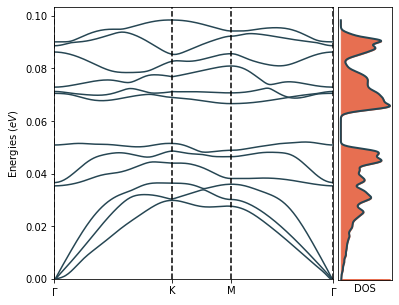

In [188]:
with open(r"7x7x1/phonons.pickle", "rb") as input_file:
    bp,dos = pickle.load(input_file)

def cutout(seq, idx,idx1):
        """
        Remove element at `idx` from `seq`.
        TODO: error checks.
        """
        return seq[:idx] + seq[idx + idx1:]
    
    
    

fig,ax=plt.subplots(figsize=(5,5))
energies=bp.energies[0].T
energies[energies<0]=0
k=bp.get_labels()
for j,i in enumerate(energies):
    x=k[0];y=i
    n=18;m=3
    d=0.0004
    if j==0:
        y[0:n]=(x[0:n]**2)*0.064
        poly = np.polyfit(x,y,24)
        y=np.poly1d(poly)(x)
        d=0
    plt.plot(x,y-d,c="#264653",ls="-")
for i in k[1]:plt.axvline(i,c="k",ls="--")
ax.set_xticks(k[1])
ax.set_xticklabels(k[2][:-4])
dosax = fig.add_axes([0.914, 0.123, .15, .758])
energy=np.linspace(dos.energy.min(),dos.energy.max(),1000)
dos_vals=dos.sample(energy, width=9e-4, smearing='Gauss', gridtype='general').weights
dosax.plot(dos_vals[0], energy, color='#264653', lw=2)
dosax.fill_between(dos_vals[0],energy, y2=0, color='#e76f51',
                   edgecolor='#264653', lw=1,alpha=1)

dosax.set_yticks([])
dosax.set_xticks([])
dosax.set_xlabel("DOS")
dosax.set_ylim(bottom=0)
ax.set_ylim(bottom=0)
ax.set_ylabel("Energies $(eV)$")
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_xticklabels(["$\Gamma$" if x=="G" else x for x in bp.get_labels()[2]])
plt.savefig("Phonons.png",dpi=400, bbox_inches='tight')
plt.show()

['G', 'K', 'M', 'G']